In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('C:/Users/Administrator/데이터모음/축구/FIFA_train.csv')
test = pd.read_csv('C:/Users/Administrator/데이터모음/축구/FIFA_test.csv')
submission = pd.read_csv('C:/Users/Administrator/데이터모음/축구/submission.csv')

In [3]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


1.골키퍼는 개인기 지수가 낮고 낮아도 의미가 없다\
수비수는 개인기 지수가 높으면 좋지만 평균적으로 높지않을것이다\
미드필더와 공격수는 개인기 지수가 평균적으로 높을 것이다

이러한 상황을 인지하고 stat_skill_moves컬럼의 파생변수를 만들자

즉 개인기 기술을 포지션별로 정규화를 시키자

2.문제발견 데이터의 id 컬럼이 선수가 비쌀수록 낮은데 그 이유는 fifa기준으로 잘하는 선수들 기준으로 내림차순 정렬을 했기때문\
\
만약 이러한 사실을 간과하고 분석을 진행을 하면 지금 본 프로젝트에선 당장 결과가 좋을지 몰라도 분석을 진행을 한다는 관점에선 최악의 변수\
선택이라고 판단함\
그래서 id 컬럼은 드롭을 시키자

In [4]:
unique_len = train.apply(lambda x: len(x.unique()))
print(unique_len,train.dtypes)

id                  8932
name                8932
age                   25
continent              5
contract_until        17
position               4
prefer_foot            2
reputation             5
stat_overall          46
stat_potential        45
stat_skill_moves       5
value                198
dtype: int64 id                    int64
name                 object
age                   int64
continent            object
contract_until       object
position             object
prefer_foot          object
reputation          float64
stat_overall          int64
stat_potential        int64
stat_skill_moves    float64
value               float64
dtype: object


In [5]:
unique_len = test.apply(lambda x: len(x.unique()))
unique_len

print(unique_len,test.dtypes)

id                  3828
name                3828
age                   26
continent              5
contract_until        18
position               4
prefer_foot            2
reputation             5
stat_overall          47
stat_potential        43
stat_skill_moves       5
dtype: int64 id                    int64
name                 object
age                   int64
continent            object
contract_until       object
position             object
prefer_foot          object
reputation          float64
stat_overall          int64
stat_potential        int64
stat_skill_moves    float64
dtype: object


In [6]:
train_GK = train[train['position'] == 'GK']
train_GK

train_GK['stat_skill_moves'].value_counts()

1.0    1008
Name: stat_skill_moves, dtype: int64

In [7]:
train = train.drop('id',axis = 1)
test = test.drop('id',axis = 1)
train

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...
8927,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


# 포지션 별로 스킬 스탯 표준화하기

In [8]:
test

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...
3823,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


In [9]:
train_st = train[train['position'] == 'ST']
train_mf = train[train['position'] == 'MF']
train_df = train[train['position'] == 'DF']
train_gk = train[train['position'] == 'gk']
train['stat_skill_moves_1'] = 0

for i in range(len(train)):
    if train['position'].iloc[i] == 'ST':
        train['stat_skill_moves_1'].iloc[i] = train['stat_skill_moves'].iloc[i] - train_st['stat_skill_moves'].mean()
    elif train['position'].iloc[i] == 'MF':
        train['stat_skill_moves_1'].iloc[i] = train['stat_skill_moves'].iloc[i] - train_mf['stat_skill_moves'].mean()
    elif train['position'].iloc[i] == 'DF':
        train['stat_skill_moves_1'].iloc[i] = train['stat_skill_moves'].iloc[i] - train_df['stat_skill_moves'].mean()
    else:
        train['stat_skill_moves_1'].iloc[i] = train['stat_skill_moves'].iloc[i] - train_gk['stat_skill_moves'].mean()

test_st = test[test['position'] == 'ST']
test_mf = test[test['position'] == 'MF']
test_df = test[test['position'] == 'DF']
test_gk = test[test['position'] == 'gk']
test['stat_skill_moves_1'] = 0

for i in range(len(test)):
    if test['position'].iloc[i] == 'ST':
        test['stat_skill_moves_1'].iloc[i] = test['stat_skill_moves'].iloc[i] - test_st['stat_skill_moves'].mean()
    elif test['position'].iloc[i] == 'MF':
        test['stat_skill_moves_1'].iloc[i] = test['stat_skill_moves'].iloc[i] - test_mf['stat_skill_moves'].mean()
    elif test['position'].iloc[i] == 'DF':
        test['stat_skill_moves_1'].iloc[i] = test['stat_skill_moves'].iloc[i] - test_df['stat_skill_moves'].mean()
    else:
        test['stat_skill_moves_1'].iloc[i] = test['stat_skill_moves'].iloc[i] - test_gk['stat_skill_moves'].mean()

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
train['stat_skill_moves_1'] = train['stat_skill_moves_1'].fillna(0)
test['stat_skill_moves_1'] = test['stat_skill_moves_1'].fillna(0)

# 다중공선성 확인

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
y_train = train['value']
x_train = train.drop('value', axis = 1)

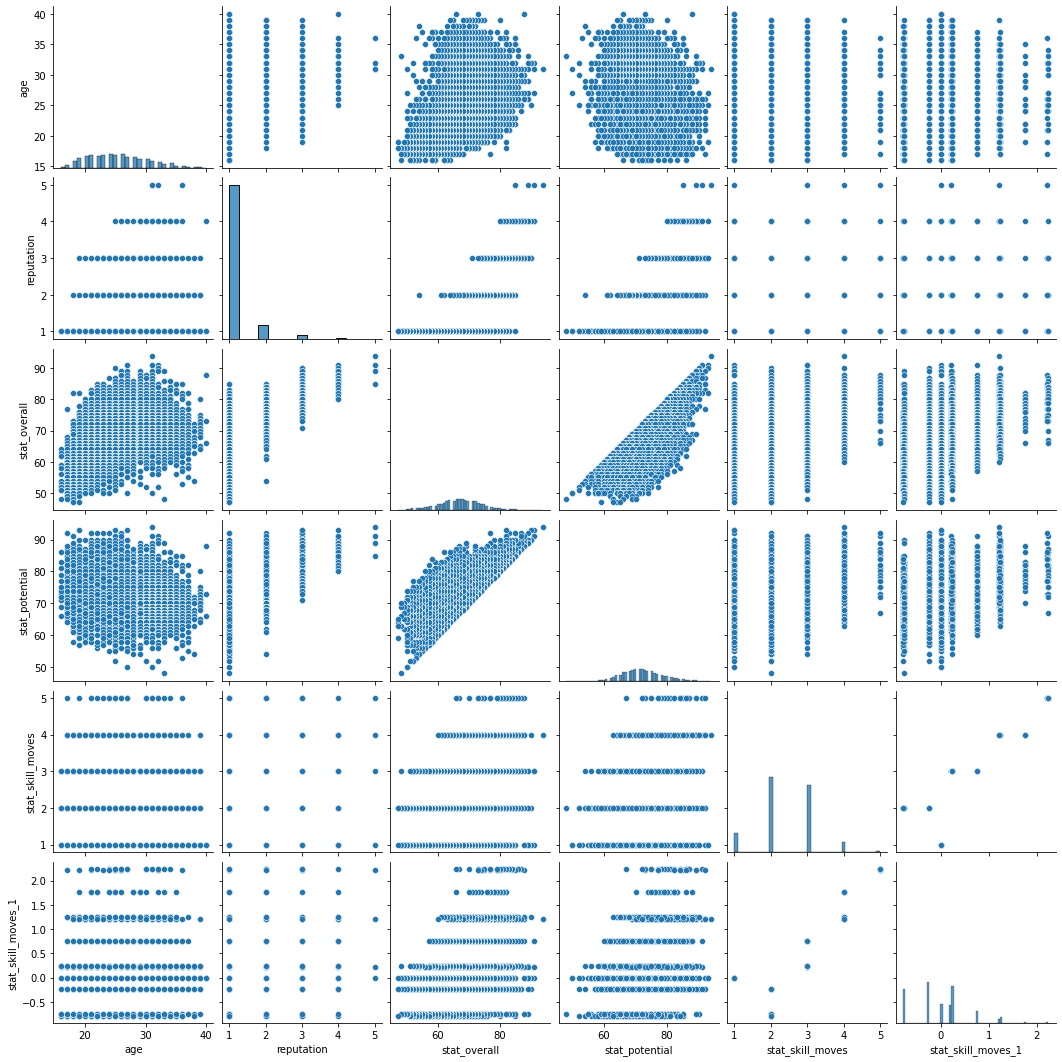

In [13]:
from statsmodels.datasets.longley import load_pandas
import seaborn as sns
from matplotlib import pyplot as plt

sns.pairplot(x_train)
plt.show()

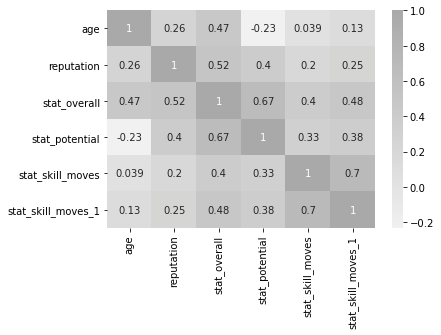

In [14]:
#상관계수확인
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(x_train.corr(), annot=True, cmap=cmap)
plt.show()

In [15]:
#OLS 모델 만들기
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

train_x, train_y = train_test_split(train, test_size=0.25, random_state=3)
model = sm.OLS.from_formula("value ~ age + reputation + stat_overall + stat_skill_moves + stat_potential+stat_skill_moves_1", data=train_x).fit()

train_x, train_y, model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2098.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:24:09   Log-Likelihood:            -1.1031e+05
No. Observations:                6699   AIC:                         2.206e+05
Df Residuals:                    6692   BIC:                         2.207e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.471e+07   8.17

회귀 분석을 돌려본 결과를 보면 stat_skill_move(개인기)가 y값과 음의 상관계수를 가진다고 하는데 이건 말이 안된다\
축구는 개인기를 잘하면 좋은 평가를 받지 절대 나쁜 평가를 받는 부분이 아니라고 생각\
하지만 내가 정규화 시킨 stat_skill_move_1걸럼은 양의 상관계수를 가지는데 내가 생각한것이 맞아 기분이 좋다\
stat_skill_move는 드랍 시키겠다


그리고 Notes 부분에 다중공선성이 존재한다고 말하고 있다

In [16]:
#stat_skill_moves는 드랍
x_train = x_train.drop('stat_skill_moves',axis = 1)
test = test.drop('stat_skill_moves',axis = 1)

In [17]:
#숫자형인거만 뽑기
numerical_feats = x_train.dtypes[train.dtypes != "object"].index.tolist()

numerical_feats

['age', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves_1']

In [18]:
#다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train[numerical_feats].values, i) for i in range(x_train[numerical_feats].shape[1])]
vif["features"] = x_train[numerical_feats].columns
vif

,VIF Factor,features
0,69.392927,age
1,10.565022,reputation
2,586.796226,stat_overall
3,309.623330,stat_potential
4,1.231457,stat_skill_moves_1


In [19]:
x_train

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves_1
0,L. Messi,31,south america,2021,ST,left,5.0,94,94,1.218182
1,De Gea,27,europe,2020,GK,right,4.0,91,93,0.000000
2,L. Suárez,31,south america,2021,ST,right,5.0,91,91,0.218182
3,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,0.763167
4,J. Oblak,25,europe,2021,GK,right,3.0,90,93,0.000000
...,...,...,...,...,...,...,...,...,...,...
8927,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,0.240957
8928,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,-0.236833
8929,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,-0.236833
8930,J. Milli,18,europe,2021,GK,right,1.0,47,65,0.000000


In [20]:
#정규화 시키기
from sklearn.preprocessing import StandardScaler

numerical_feats.remove('stat_skill_moves_1')#이건 위에서 벌써 표준화를 시킴
scaler = StandardScaler()

x_train[numerical_feats] = scaler.fit_transform(x_train[numerical_feats])
test[numerical_feats] = scaler.fit_transform(test[numerical_feats])

In [21]:
x_train

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves_1
0,L. Messi,1.249309,south america,2021,ST,left,9.130280,3.925708,3.674598,1.218182
1,De Gea,0.386357,europe,2020,GK,right,6.770499,3.488041,3.507592,0.000000
2,L. Suárez,1.249309,south america,2021,ST,right,9.130280,3.488041,3.173580,0.218182
3,Sergio Ramos,1.465046,europe,2020,DF,right,6.770499,3.488041,3.173580,0.763167
4,J. Oblak,-0.045118,europe,2021,GK,right,4.410719,3.342152,3.507592,0.000000
...,...,...,...,...,...,...,...,...,...,...
8927,S. Adewusi,-1.555283,africa,2019,MF,right,-0.308843,-2.785186,-1.502586,0.240957
8928,C. Ehlich,-1.339545,europe,2020,DF,right,-0.308843,-2.931075,-2.170610,-0.236833
8929,N. Fuentes,-1.555283,south america,2021,DF,right,-0.308843,-2.931075,-1.335580,-0.236833
8930,J. Milli,-1.555283,europe,2021,GK,right,-0.308843,-2.931075,-1.168574,0.000000


In [22]:
#정규화 시키고 VIF 계산

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train[numerical_feats].values, i) for i in range(x_train[numerical_feats].shape[1])]
vif["features"] = x_train[numerical_feats].columns
vif

,VIF Factor,features
0,4.050755,age
1,1.421260,reputation
2,6.725638,stat_overall
3,5.716828,stat_potential


정규화를 시켜서 VIF지수가 많이 낮아졌다 stat_overall은 선수의 능력치를 나타내는 지표라 중요하다 생각해서 놔두자
### 이로써 숫자형 처리완료

# 문자형 라벨링

이름 컬럼은 드랍시키자 의미가 없을거 같다

In [23]:
x_train = x_train.drop('name', axis = 1)
test = test.drop('name',axis = 1)

# 원핫인코딩과 라벨링

왜 라벨링도 하고 원핫인코딩도 하냐면 contract_until 변수가 test하고 train셋에 unique값이 다르다 즉 들고잇는 인자 종류의 개수가 다르다 그래서 contract_until 변수를 원핫인코딩을 진행을 하면 두 데이터셋의 변수의 개수가 달라져 모델이 돌아가지 않는다 그래서 contract_until 변수는 라벨링을 씌우자

In [24]:
ct_ft = x_train.dtypes[x_train.dtypes == "object"].index.tolist()
ct_ft.remove('contract_until')
ct_ft

['continent', 'position', 'prefer_foot']

In [25]:
#원핫 인코딩
a= pd.get_dummies(x_train[ct_ft])
x_train = x_train.join(a)

b= pd.get_dummies(test[ct_ft])
test = test.join(b)

In [26]:
x_train = x_train.drop(ct_ft, axis = 1)
test = test.drop(ct_ft, axis = 1)
x_train

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves_1,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,1.249309,2021,9.130280,3.925708,3.674598,1.218182,0,0,0,0,1,0,0,0,1,1,0
1,0.386357,2020,6.770499,3.488041,3.507592,0.000000,0,0,1,0,0,0,1,0,0,0,1
2,1.249309,2021,9.130280,3.488041,3.173580,0.218182,0,0,0,0,1,0,0,0,1,0,1
3,1.465046,2020,6.770499,3.488041,3.173580,0.763167,0,0,1,0,0,1,0,0,0,0,1
4,-0.045118,2021,4.410719,3.342152,3.507592,0.000000,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,-1.555283,2019,-0.308843,-2.785186,-1.502586,0.240957,1,0,0,0,0,0,0,1,0,0,1
8928,-1.339545,2020,-0.308843,-2.931075,-2.170610,-0.236833,0,0,1,0,0,1,0,0,0,0,1
8929,-1.555283,2021,-0.308843,-2.931075,-1.335580,-0.236833,0,0,0,0,1,1,0,0,0,0,1
8930,-1.555283,2021,-0.308843,-2.931075,-1.168574,0.000000,0,0,1,0,0,0,1,0,0,0,1


In [27]:
#라벨링
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()#라벨링 인코더 불러오기

x_train['contract_until'] = label_encoder.fit_transform(x_train['contract_until'])
test['contract_until'] = label_encoder.fit_transform(test['contract_until'])

# 랜덤포레스트 회귀 모델 돌려보기

In [28]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=128)
clf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=128)

In [29]:
pr = clf.predict(test)
print(pr)

[6.82343750e+07 7.63242188e+07 6.67304688e+07 ... 5.98437500e+04
 4.71875000e+04 5.02343750e+04]


In [30]:
submission

,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
3823,16924,0
3824,16929,0
3825,16932,0
3826,16937,0


In [31]:
submission.iloc[:,1:] = pr 

In [32]:
submission

,id,value
0,1,6.823438e+07
1,2,7.632422e+07
2,4,6.673047e+07
3,5,6.731250e+07
4,6,5.841016e+07
...,...,...
3823,16924,5.976562e+04
3824,16929,5.085938e+04
3825,16932,5.984375e+04
3826,16937,4.718750e+04


In [33]:
submission.to_csv("축구데이터_랜던포레스트_교차x.csv", index = False)

# 변수중요도 뽑아보기

In [34]:
list(clf.feature_importances_)

[0.03624938830974075,
 0.001664665345632733,
 0.003046748032692356,
 0.846577067886889,
 0.09607834662093974,
 0.0071310154814352485,
 0.0002553010538184829,
 2.92887652847331e-05,
 0.0005739569700236585,
 8.582607135359372e-06,
 0.0004001048088147354,
 0.0025144692948555203,
 0.001686972647137608,
 0.0006501045652572472,
 0.0021506582768391425,
 0.0004600338659595655,
 0.0005232954675440593]

In [35]:
#변수중요도 그래프 그리기
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)#데이터 정렬(내림차순)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

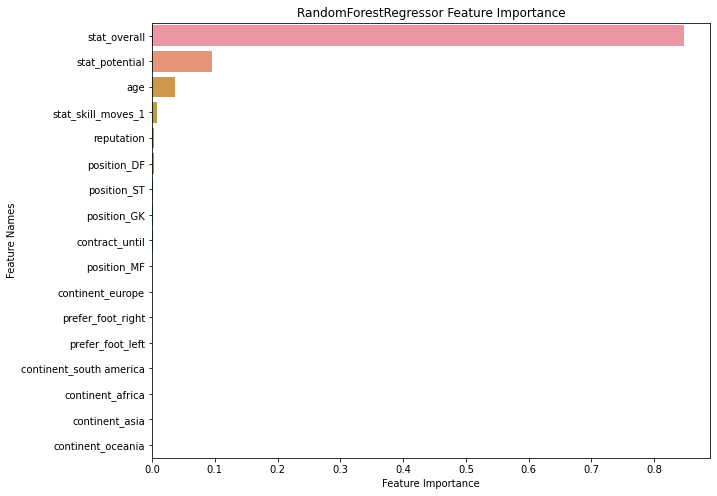

In [36]:
plot_feature_importance(clf.feature_importances_,test.columns,'RandomForestRegressor')

# 교차검증 모델

In [37]:
x_train.shape,y_train.shape

((8932, 17), (8932,))

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMRegressor

In [39]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)

In [40]:
x_train_1 = x_train
y_train_1 = y_train

In [41]:
x_train_1.shape, y_train_1.shape

((8932, 17), (8932,))

In [42]:
for n_fold,(train_index, val_index) in enumerate(folds.split(x_train_1, y_train_1)):
    print(n_fold,(train_index, val_index))

0 (array([   1,    2,    3, ..., 8929, 8930, 8931]), array([   0,    4,    8, ..., 8909, 8919, 8924]))
1 (array([   0,    2,    3, ..., 8928, 8929, 8931]), array([   1,    5,    9, ..., 8910, 8927, 8930]))
2 (array([   0,    1,    3, ..., 8929, 8930, 8931]), array([   2,   10,   11, ..., 8916, 8918, 8921]))
3 (array([   0,    1,    2, ..., 8928, 8930, 8931]), array([   3,    6,   16, ..., 8911, 8917, 8929]))
4 (array([   0,    1,    2, ..., 8927, 8929, 8930]), array([   7,   12,   17, ..., 8926, 8928, 8931]))


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [44]:
y_pred = np.zeros(len(test))
n_splits = 5
for n_fold,(train_index, val_index) in enumerate(folds.split(x_train_1, y_train_1)):
    X_train, X_val = x_train_1.iloc[train_index], x_train_1.iloc[val_index]
    y_train, y_val = y_train_1.iloc[train_index], y_train_1.iloc[val_index]
    clf = LGBMRegressor(n_estimators = 10000, learning_rate= 0.1,objective = 'mse')
    clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric= 'rmse', early_stopping_rounds= 50,verbose = 100) 
    y_pred += clf.predict(test) / n_splits

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 1.31118e+06	valid_0's l2: 1.71919e+12
[200]	valid_0's rmse: 1.24797e+06	valid_0's l2: 1.55743e+12
[300]	valid_0's rmse: 1.22972e+06	valid_0's l2: 1.51221e+12
[400]	valid_0's rmse: 1.20511e+06	valid_0's l2: 1.4523e+12
[500]	valid_0's rmse: 1.16816e+06	valid_0's l2: 1.36459e+12
[600]	valid_0's rmse: 1.13973e+06	valid_0's l2: 1.29899e+12
[700]	valid_0's rmse: 1.13498e+06	valid_0's l2: 1.28818e+12
[800]	valid_0's rmse: 1.11656e+06	valid_0's l2: 1.24671e+12
[900]	valid_0's rmse: 1.10643e+06	valid_0's l2: 1.22418e+12
[1000]	valid_0's rmse: 1.10119e+06	valid_0's l2: 1.21262e+12
[1100]	valid_0's rmse: 1.09283e+06	valid_0's l2: 1.19427e+12
[1200]	valid_0's rmse: 1.08955e+06	valid_0's l2: 1.18713e+12
[1300]	valid_0's rmse: 1.08514e+06	valid_0's l2: 1.17753e+12
[1400]	valid_0's rmse: 1.08008e+06	valid_0's l2: 1.16657e+12
[1500]	valid_0's rmse: 1.07917e+06	valid_0's l2: 1.16462e+12
[1600]	valid_0's rmse: 1.07698e+06

In [45]:
y_pred

array([6.64155910e+07, 7.46685121e+07, 7.10412798e+07, ...,
       7.77864215e+04, 6.67053193e+04, 6.63098499e+04])

In [46]:
submission

,id,value
0,1,6.823438e+07
1,2,7.632422e+07
2,4,6.673047e+07
3,5,6.731250e+07
4,6,5.841016e+07
...,...,...
3823,16924,5.976562e+04
3824,16929,5.085938e+04
3825,16932,5.984375e+04
3826,16937,4.718750e+04


In [47]:
submission.iloc[:,1:] = y_pred

In [48]:
submission

,id,value
0,1,6.641559e+07
1,2,7.466851e+07
2,4,7.104128e+07
3,5,7.624119e+07
4,6,6.334054e+07
...,...,...
3823,16924,7.295295e+04
3824,16929,5.856548e+04
3825,16932,7.778642e+04
3826,16937,6.670532e+04


In [49]:
submission.to_csv("축구데이터_LGBM_교차o.csv", index = False)